<a href="https://colab.research.google.com/github/CelesTech03/Data-Analytics-Winter-2022/blob/main/Python/Week%203/Day_1_Visualizing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from time import sleep

In [2]:
# Generates an array of 500 random values
x = np.random.rand(500)
# Outputs the first 5 values in array x
x[:5]

array([0.71322183, 0.28791653, 0.05105855, 0.76660843, 0.49110976])

In [3]:
# Creates an array of 500 random values and broadcasts division to each item
noise = np.random.randn(500)/4
# Outputs the first 5 items in array noise
noise[:5]

array([-0.10350654, -0.5169237 , -0.14337102,  0.34587026,  0.40754816])

In [4]:
m = 2 # slope or weight
c = 3 # coffecient or bias

In [5]:
# Equation of the line y = mx + c
y = x * m + c + noise
y[:5]

array([4.32293713, 3.05890936, 2.95874609, 4.87908712, 4.38976768])

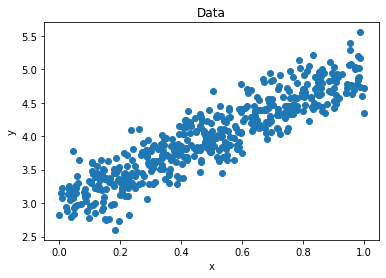

In [6]:
# Visualise Our data
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# Convert inputs and targets to tensors (multi-d matrix with a single data type)
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

tensor([0.7132, 0.2879, 0.0511, 0.7666, 0.4911], dtype=torch.float64)
tensor([4.3229, 3.0589, 2.9587, 4.8791, 4.3898], dtype=torch.float64)


In [8]:
# Changing the data type to float32 as our model accepts float32 data type
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [9]:
# Reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
# (reason for -1): want it to shape the tesnor (input) in a way that is consistent with its original shape
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)

In [10]:
print(targets[:5])

tensor([[4.3229],
        [3.0589],
        [2.9587],
        [4.8791],
        [4.3898]])


In [11]:
# x * m + c
# Creating another torch that stores the y values generated from slope intercept formula
actual_targets = torch.from_numpy(x * m + c)
# Convert to float for model to accept
actual_targets = actual_targets.type(torch.float32)
actual_targets = actual_targets.reshape(-1,1)
print(actual_targets[:5])

tensor([[4.4264],
        [3.5758],
        [3.1021],
        [4.5332],
        [3.9822]])


In [12]:
# Define linear regression model

# Model will use nn.Linear - newer network linear pytorch 
model = nn.Linear(1, 1) # (no. of input features, no. of output features)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model

Parameter containing:
tensor([[0.9913]], requires_grad=True)
Parameter containing:
tensor([0.8696], requires_grad=True)


In [13]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[0.9913]], requires_grad=True), Parameter containing:
 tensor([0.8696], requires_grad=True)]

In [14]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
# Passing in x and y values (tensors) : to determine the distance between an estimated value(targets) and its true value(inputs)
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(6.9899, grad_fn=<MseLossBackward0>)


In [15]:
# Define optimizer
# SGD: Random Gradient Descent
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

In [16]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)


Epoch [10/310], Loss: 5.0839


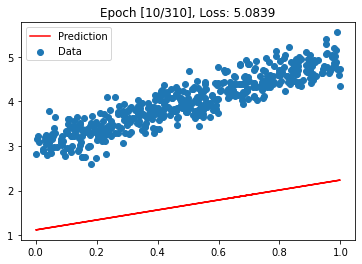

Epoch [20/310], Loss: 3.8667


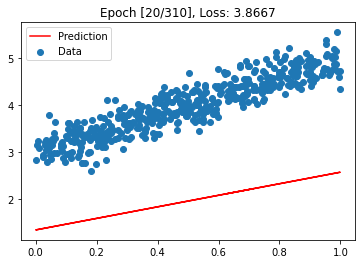

Epoch [30/310], Loss: 2.9315


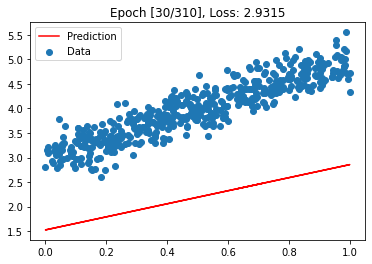

Epoch [40/310], Loss: 2.2141


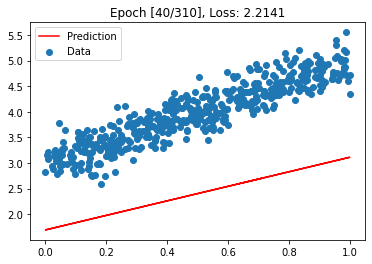

Epoch [50/310], Loss: 1.6650


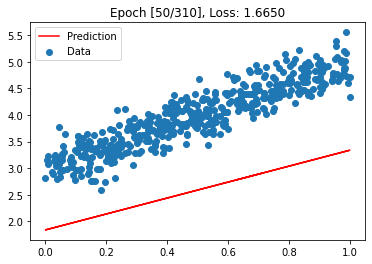

Epoch [60/310], Loss: 1.2456


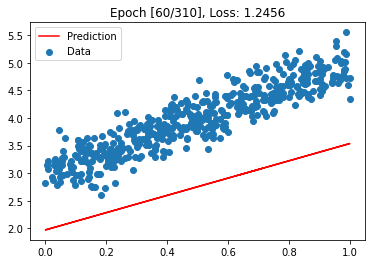

Epoch [70/310], Loss: 0.9262


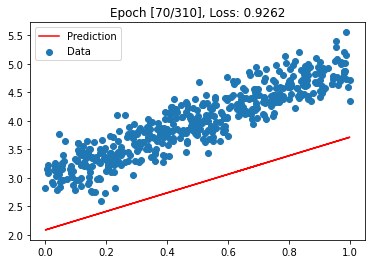

Epoch [80/310], Loss: 0.6837


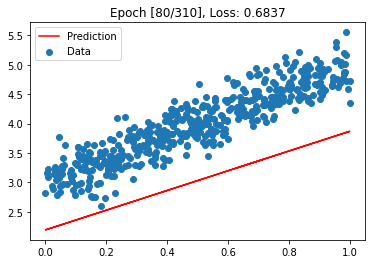

Epoch [90/310], Loss: 0.5004


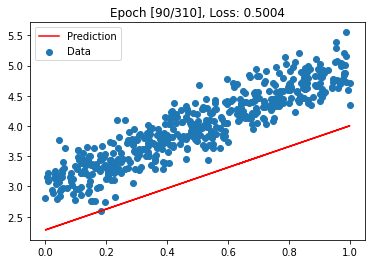

Epoch [100/310], Loss: 0.3625


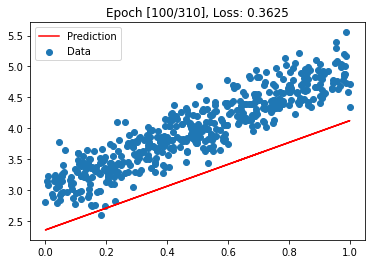

Epoch [110/310], Loss: 0.2593


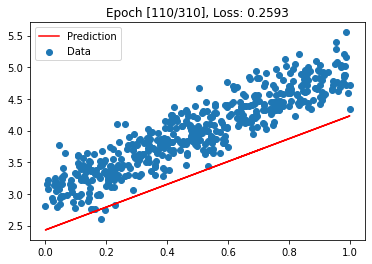

Epoch [120/310], Loss: 0.1826


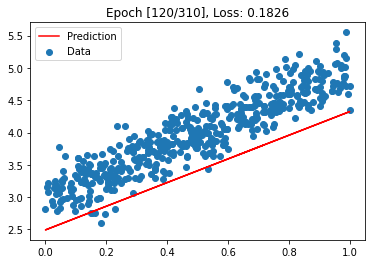

Epoch [130/310], Loss: 0.1261


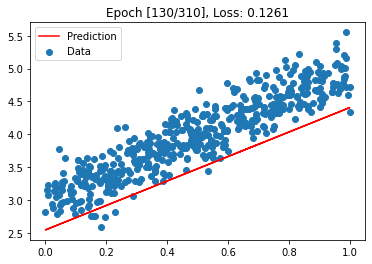

Epoch [140/310], Loss: 0.0850


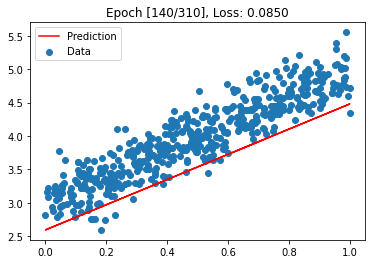

Epoch [150/310], Loss: 0.0554


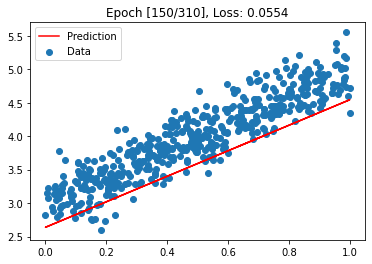

Epoch [160/310], Loss: 0.0346


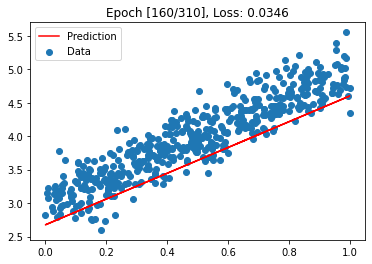

Epoch [170/310], Loss: 0.0202


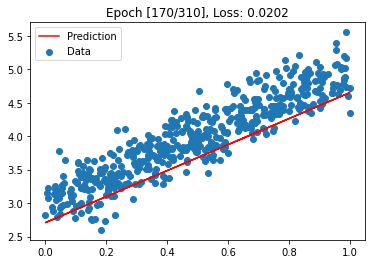

Epoch [180/310], Loss: 0.0108


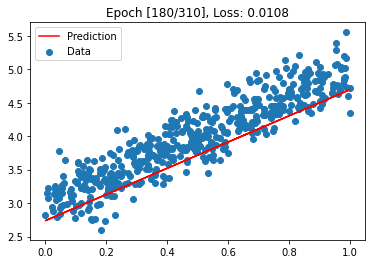

Epoch [190/310], Loss: 0.0049


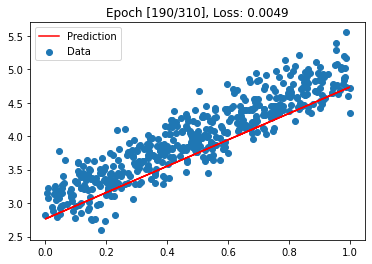

Epoch [200/310], Loss: 0.0016


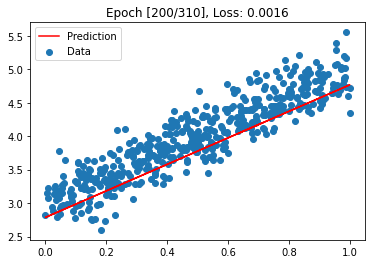

Epoch [210/310], Loss: 0.0002


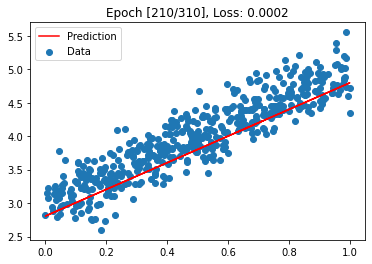

Epoch [220/310], Loss: 0.0001


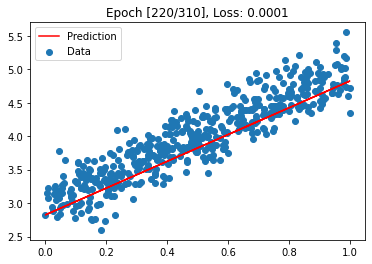

Epoch [230/310], Loss: 0.0009


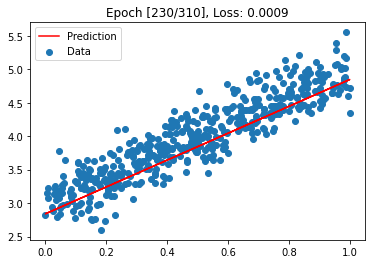

Epoch [240/310], Loss: 0.0023


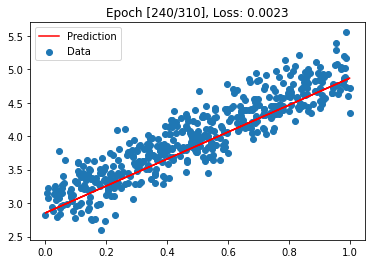

Epoch [250/310], Loss: 0.0041


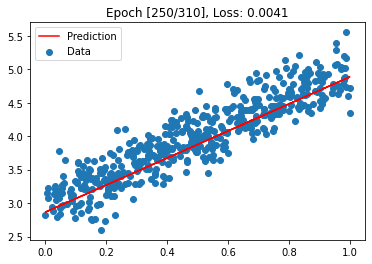

Epoch [260/310], Loss: 0.0061


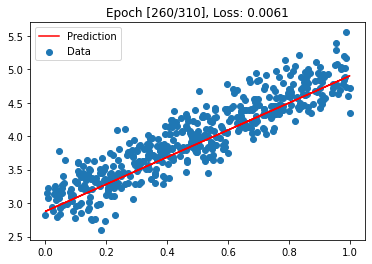

Epoch [270/310], Loss: 0.0082


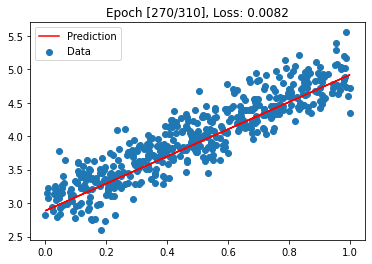

Epoch [280/310], Loss: 0.0103


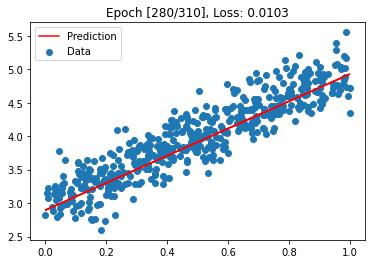

Epoch [290/310], Loss: 0.0123


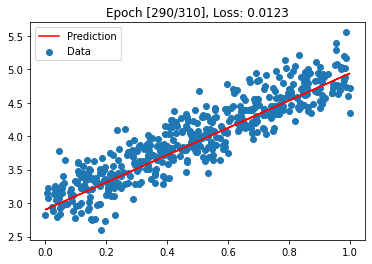

Epoch [300/310], Loss: 0.0142


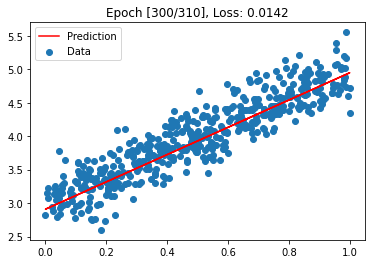

Epoch [310/310], Loss: 0.0161


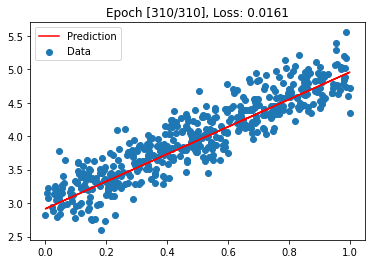

In [17]:
fit(310, model, loss_fn, opt,inputs, targets, )

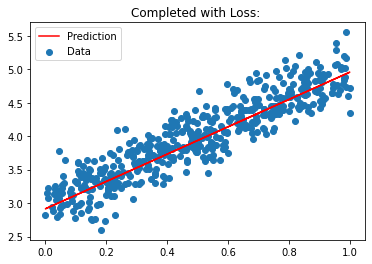

In [18]:
preds = model(inputs)
plt.scatter(inputs,targets, label="Data")
plt.plot(inputs,preds.detach().numpy(),"r-", label="Prediction")
plt.title('Completed with Loss: ')
plt.legend()
plt.show()